#Correlation Analysis

In [ ]:
#Copy the data before treatment
df1 = df.copy()
df1.head(5)

In [ ]:
df_corr = df1.corr(numeric_only=True)
df_corr

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
Attachments,1.000000,0.028701,-0.002115,0.002887,-0.020107,0.004543,0.019392,0.010445,-0.004140,0.013761
Link Count,0.028701,1.000000,0.022396,0.009577,0.008401,0.012846,-0.000626,0.001353,0.024588,0.001327
Word Count,-0.002115,0.022396,1.000000,0.635817,0.005551,-0.000697,0.000358,-0.002474,0.024591,-0.006414
Uppercase Count,0.002887,0.009577,0.635817,1.000000,0.006226,0.004274,-0.006474,0.021011,0.007838,-0.008214
Exclamation Count,-0.020107,0.008401,0.005551,0.006226,1.000000,-0.005900,-0.003063,0.004048,-0.008308,-0.001325
Question Count,0.004543,0.012846,-0.000697,0.004274,-0.005900,1.000000,0.004516,-0.006825,0.004366,-0.029574
Dollar Count,0.019392,-0.000626,0.000358,-0.006474,-0.003063,0.004516,1.000000,-0.031034,-0.006467,-0.010132
Punctuation Count,0.010445,0.001353,-0.002474,0.021011,0.004048,-0.006825,-0.031034,1.000000,-0.016591,-0.004693
HTML Tags Count,-0.004140,0.024588,0.024591,0.007838,-0.008308,0.004366,-0.006467,-0.016591,1.000000,0.002743
Spam Indicator,0.013761,0.001327,-0.006414,-0.008214,-0.001325,-0.029574,-0.010132,-0.004693,0.002743,1.000000


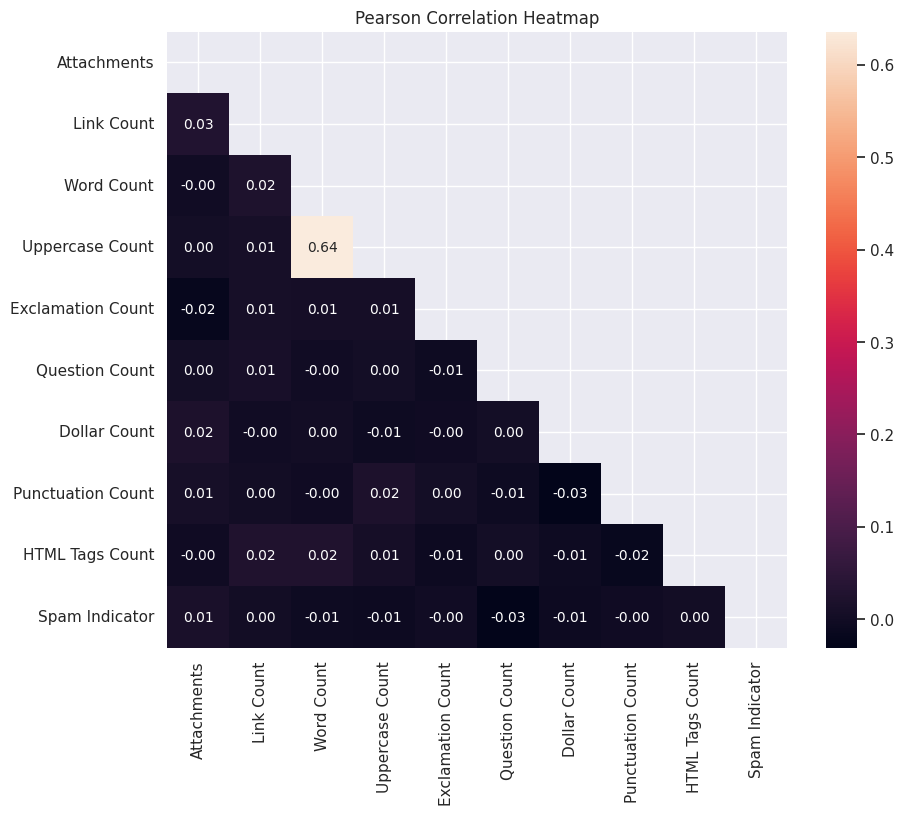

In [ ]:
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

#Drop Columns

In [ ]:
df1 = df1.drop(columns = ['Email','Subject','Sender','Recipient','Date','Time'])
df1.head(5)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32,3,3,0,11,1,1
1,3,9,45,1,2,1,2,8,2,1
2,3,9,52,1,4,0,2,10,1,1
3,2,3,75,6,0,2,0,8,2,0
4,3,5,299,279,0,2,0,6,1,1


Check the correlation on data before drop the columns for dimensional reduction and improve model interpretabilty and dependecies of the columns

#Target Analysis

In [ ]:
print(df1['Spam Indicator'].value_counts())

Spam Indicator
0    3018
1    2982
Name: count, dtype: int64


In [ ]:
target = df1['Spam Indicator'].value_counts().reset_index()
target.rename(columns={'index':'Spam Indicator','freq':'Spam Indicator'}, inplace=True)
target['percentage'] = (target['count'] / target['count'].sum()) * 100
target

,Spam Indicator,count,percentage
0,0,3018,50.3
1,1,2982,49.7


<ipython-input-17-eb268a55e539>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = default.index, y = default.values, palette=colors)


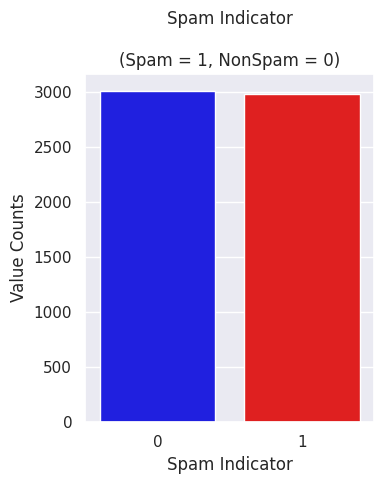

In [ ]:
default = df1['Spam Indicator'].value_counts()
fig,ax=plt.subplots(figsize=(4,5))
colors = ['blue', 'red']
plt.title("Spam Indicator\n\n(Spam = 1, NonSpam = 0)")
sns.barplot(x = default.index, y = default.values, palette=colors)
plt.ylabel('Value Counts')
plt.xlabel('Spam Indicator')
plt.tight_layout()
plt.show()

##On Percentage

<ipython-input-18-86caf3648a83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = default.index, y = default.values, palette=colors)


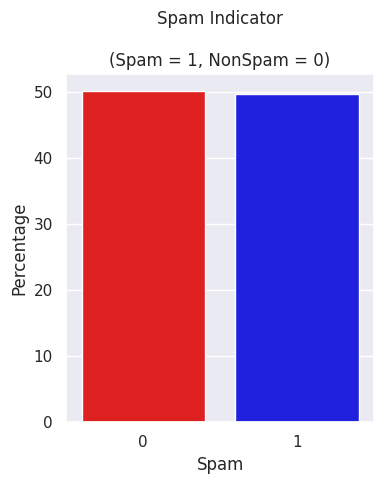

In [ ]:
default = df1['Spam Indicator'].value_counts(True)*100
fig,ax=plt.subplots(figsize=(4,5))
colors = ['red', 'blue']
plt.title("Spam Indicator\n\n(Spam = 1, NonSpam = 0)")
sns.barplot(x = default.index, y = default.values, palette=colors)
plt.ylabel('Percentage')
plt.xlabel('Spam')
plt.tight_layout()
plt.show()

- Since the data balanced , we just straight to split and modeling the data